*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will create a book recommendation algorithm using **K-Nearest Neighbors**.

You will use the [Book-Crossings dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users. 

After importing and cleaning the data, use `NearestNeighbors` from `sklearn.neighbors` to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures distance to determine the “closeness” of instances.

Create a function named `get_recommends` that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

This code:

`get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")`

should return:

```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301], 
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479], 
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```

Notice that the data returned from `get_recommends()` is a list. The first element in the list is the book title passed in to the function. The second element in the list is a list of five more lists. Each of the five lists contains a recommended book and the distance from the recommended book to the book passed in to the function.

If you graph the dataset (optional), you will notice that most books are not rated frequently. To ensure statistical significance, remove from the dataset users with less than 200 ratings and books with less than 100 ratings.

The first three cells import libraries you may need and the data to use. The final cell is for testing. Write all your code in between those cells.

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [2]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2022-04-27 10:48:23--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  --.-KB/s    in 0.1s    

2022-04-27 10:48:23 (220 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [4]:
# add your code here - consider creating a new cell for each section of code

In [5]:
# display the data

display(df_books)
display(df_ratings)

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber
...,...,...,...
271374,0440400988,There's a Bat in Bunk Five,Paula Danziger
271375,0525447644,From One to One Hundred,Teri Sloat
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker
271377,0192126040,Republic (World's Classics),Plato


,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
...,...,...,...
1149775,276704,1563526298,9.0
1149776,276706,0679447156,0.0
1149777,276709,0515107662,10.0
1149778,276721,0590442449,10.0


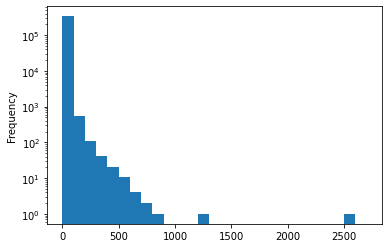

In [6]:
# Count how many ratings each book has (by isbn) and plot the result into a
# histogram on a log scale.

ratings_book = df_ratings.groupby('isbn')['user'].count()
ratings_book.plot(kind='hist', bins=list(range(0, 2800, 100)), log=True)

# most of the books have less than 100 ratings

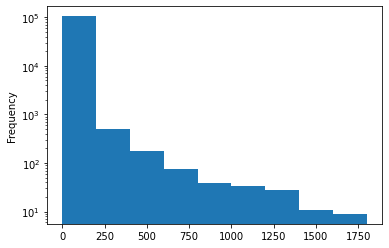

In [7]:
# Count how many ratings each user has produced and plot the result into a
# histogram on a log scale.

ratings_user = df_ratings.groupby('user')['isbn'].count()
ratings_user.plot(kind='hist', bins=list(range(0,2000,200)), log=True)

# Most of the users produced less than 200 ratings.

In [8]:
# filter ratings for statistical significance 

filtered_users = df_ratings.groupby('user').filter(lambda x: len(x) >= 200)
filtered_books = df_ratings.groupby('isbn').filter(lambda x: len(x) >= 100)
df_ratings = filtered_users.merge(filtered_books)
display(df_ratings)

,user,isbn,rating
0,277427,002542730X,10.0
1,277427,0060930535,0.0
2,277427,0060934417,0.0
3,277427,0061009059,9.0
4,277427,0140067477,0.0
...,...,...,...
49776,275970,0804111359,0.0
49777,275970,140003065X,0.0
49778,275970,1400031346,0.0
49779,275970,1400031354,0.0


In [9]:
# merge df_ratings and df_books by isbn

df = pd.merge(df_ratings, df_books, on='isbn')
display(df)

,user,isbn,rating,title,author
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,13552,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
...,...,...,...,...,...
49512,238864,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49513,251843,0399149325,1.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49514,253821,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell
49515,265115,0399149325,0.0,Portrait of a Killer: Jack the Ripper -- Case ...,Patricia Cornwell


In [10]:
# Group ratings by the same user for the same book (considered as unique
# title - author pair).

ratings_group = df.groupby(['user', 'title', 'author'], as_index=False)

# see if there are duplicate ratings

duplicates = ratings_group.filter(lambda x: len(x) > 1)
display(duplicates)

# replace duplicate ratings in df by their average

df = ratings_group.mean()
display(df)

,user,isbn,rating,title,author
578,11676,014100018X,10.0,Chocolat,Joanne Harris
604,149908,014100018X,0.0,Chocolat,Joanne Harris
1267,11676,0316569321,10.0,White Oleander : A Novel,Janet Fitch
1270,16795,0316569321,9.0,White Oleander : A Novel,Janet Fitch
1275,23768,0316569321,0.0,White Oleander : A Novel,Janet Fitch
...,...,...,...,...,...
48783,261829,0743467523,6.0,Dreamcatcher,Stephen King
49217,32773,0671727796,9.0,The Color Purple,Alice Walker
49218,36606,0671727796,0.0,The Color Purple,Alice Walker
49235,110973,0671727796,0.0,The Color Purple,Alice Walker


,user,title,author,rating
0,254,1984,George Orwell,9.0
1,254,ANGELA'S ASHES,Frank McCourt,0.0
2,254,American Gods,Neil Gaiman,10.0
3,254,Angela's Ashes (MMP) : A Memoir,Frank McCourt,0.0
4,254,Animal Farm,George Orwell,8.0
...,...,...,...,...
49201,278418,Watership Down,Richard Adams,0.0
49202,278418,Welcome to Temptation,Jennifer Crusie,0.0
49203,278418,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,0.0
49204,278418,Where the Red Fern Grows,Wilson Rawls,0.0


In [11]:
# create the pivot table books - users
# replace NaN with 0 to build a sparse matrix
book_user = pd.pivot_table(df, index='title',
                           columns='user', values='rating').fillna(0)           

display(book_user)

# create a sparse matrix from the pivot table

matrix = csr_matrix(book_user)

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Without Remorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# build a nearest neighbors model and train it with the data in the matrix

model = NearestNeighbors(algorithm='brute', metric='cosine')
model.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [13]:
# function to return recommended books - this will be tested

def get_recommends(book = ""):
  # get the row number at which the book appears in the pivot table
  book_idx = book_user.index.get_loc(book)

  # compute indices and distances of the 6 books that are closest to the input
  # 6 beacuse the first result is the book in the input.
  distances, indices = model.kneighbors(matrix[book_idx], n_neighbors=6)        
  
  # remove the result corresponding to the input
  # reorder to match the desired output format
  distances = np.flip(distances[0][1:])                                         
  indices = np.flip(indices[0][1:])
  
  recommended_books = [[book_user.index[i], d]                                  
                       for d, i in zip(distances, indices)]      
  recommended_books = [book, recommended_books]
  return recommended_books

Use the cell below to test your function. The `test_book_recommendation()` function will inform you if you passed the challenge or need to keep trying.

In [14]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2): 
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.7677075], ['The Lovely Bones: A Novel', 0.7234864]]]
You passed the challenge! 🎉🎉🎉🎉🎉
